In [3]:
# BASED ON http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html

from numpy import *   # basic package to do computation
import pylab as plt # package to plot
from sympy.solvers import solve # package for symbolic computations (use of unassigned variables)
from sympy import Symbol 
from sympy.matrices import *

In [4]:
# Definition of parameters & variables 
omega = 1.2

x=Symbol('x')
v=Symbol('v')

Y=Matrix([x,v])


In [5]:
# Definition of system (dX_dt = f(X)  : x'=v and v'=-omega x)
def dX_dt(X):
    """ Return the derivative of x and v (encoded in X: x=X[0] and v=X[1]) """
    return Matrix([ X[1] ,  -omega*X[0] ])

# Definition of system (dX_dt = f(X)  : x'=v and v'=-omega x)
def dX_dta(X):
    """ Return the derivative of x and v (encoded in X: x=X[0] and v=X[1]) """
    return array([ X[1] ,  -omega*X[0] ])

In [6]:
# === Fixed point ===
# 
# Before using !SciPy to integrate this system, we will have a closer look on 
# position equilibrium. Equilibrium occurs when the growth rate is equal to 0.

sol=solve(dX_dt([x,v]),x,v,dict=True)
#dict = True: return list (perhaps empty) of solution mappings

X_f=[sol[0][x],sol[0][v]]

all(dX_dt(X_f) == Matrix([[0.0],[  0]]) ) # should be equal to True if solution is correct! 

True

In [7]:
dX_dt([x,v])

Matrix([
[     v],
[-1.2*x]])

In [8]:
# === Stability of the fixed points ===
# Near this fixed point, the system can be linearized:
# dX_dt = A_f*X where A is the Jacobian matrix evaluated at the corresponding point.
# We have to define the Jacobian matrix:
# 

jacX=dX_dt([x,v]).jacobian(Y)

jacX.subs(x,0)


Matrix([
[   0, 1],
[-1.2, 0]])

In [9]:
jacX

Matrix([
[   0, 1],
[-1.2, 0]])

In [10]:
jacX.eigenvals() #the :1 after the eigenvalue stands for its multiplicity (could be :2 etc)

{sqrt(30)*I/5: 1, -sqrt(30)*I/5: 1}

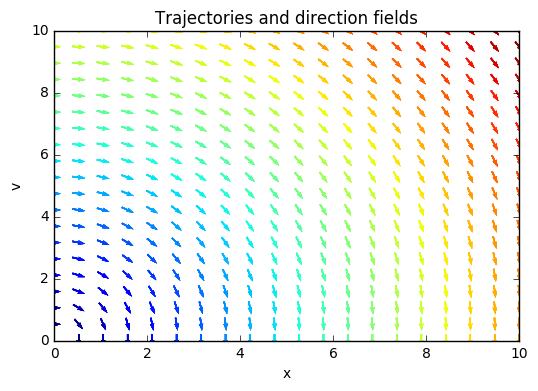

In [25]:
#-------------------------------------------------------
# define a grid and compute direction at each point
#ymax = p.ylim(ymin=0)[1]                        # get axis limits
#xmax = p.xlim(xmin=0)[1] 
ymax=10
xmax=10
nb_points   = 20                      

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dta([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M                                  

#-------------------------------------------------------
#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed

plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.jet)
# plt.legend()
# plt.grid()
# plt.xlim(0, xmax)
# plt.ylim(0, ymax)
plt.show()
# 